## Week 2: A Comparative Analysis of Noise Pollution Across Major Indian Cities (2019-2020)
## Week 1: Training and Testing

Step - 1: Import Libraries Required

In [3]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Step - 2: Load the Cleaned Dataset

In [4]:
# The path should point to the output of the Week 1 notebook
try:
    df = pd.read_csv("C:/Users/DELL/Downloads/Noise-Pollution-Project/Week1_Preprocessing/cleaned_noise_data.csv")
    print("--- Cleaned Data Loaded Successfully ---")
    print(df.head())
except FileNotFoundError:
    print("Error: 'cleaned_noise_data.csv' not found.")
    print("Please run the Week 1 preprocessing notebook first.")

--- Cleaned Data Loaded Successfully ---
        City Location_Type  Limit_Day_dB  Limit_Night_dB  Noise_Day_2019  \
0  Bengaluru    Commercial            65              55            67.2   
1  Bengaluru    Industrial            75              70            63.4   
2  Bengaluru   Residential            55              45            76.4   
3  Bengaluru    Commercial            65              55            73.1   
4  Bengaluru   Residential            55              45            64.7   

   Noise_Night_2019  Noise_Day_2020  Noise_Night_2020  
0              62.1            64.3              58.7  
1              58.4            62.6              60.9  
2              79.1            80.2              77.4  
3              72.7            71.8              71.4  
4              64.7            62.5              62.5  


Step - 3: Define Features (X) and Target (y)

In [5]:
# We want to predict the daytime noise in 2020
target = 'Noise_Day_2020'
# We use city, location type, day limit, and 2019's day noise as features
features = ['City', 'Location_Type', 'Limit_Day_dB', 'Noise_Day_2019']

X = df[features]
y = df[target]

print(f"\n--- Features (X) ---")
print(X.head())
print(f"\n--- Target (y) ---")
print(y.head())



--- Features (X) ---
        City Location_Type  Limit_Day_dB  Noise_Day_2019
0  Bengaluru    Commercial            65            67.2
1  Bengaluru    Industrial            75            63.4
2  Bengaluru   Residential            55            76.4
3  Bengaluru    Commercial            65            73.1
4  Bengaluru   Residential            55            64.7

--- Target (y) ---
0    64.3
1    62.6
2    80.2
3    71.8
4    62.5
Name: Noise_Day_2020, dtype: float64


Step - 4: Identify Categorical and Numerical Features

In [6]:
# Identify categorical and numerical features
categorical_features = ['City', 'Location_Type']
numerical_features = ['Limit_Day_dB', 'Noise_Day_2019']

# Create a preprocessor object using ColumnTransformer
# OneHotEncoder handles categorical variables. 'handle_unknown='ignore'' prevents errors
# if the test set has categories not seen in the training set.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep the numerical columns as they are
)

Step - 5: Split the Data into Training and Testing Sets

In [7]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 56 samples
Testing set size: 14 samples


Step - 6: Create and Train the Model using a Pipeline

In [8]:
# The pipeline will first apply the preprocessing steps and then train the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
print("\n--- Training the Linear Regression Model ---")
model_pipeline.fit(X_train, y_train)
print("✅ Model training complete.")



--- Training the Linear Regression Model ---
✅ Model training complete.


Step - 7: Predictions

In [ ]:
# Make Predictions on the Test Set
print("\n--- Making Predictions on the Test Set ---")
y_pred = model_pipeline.predict(X_test)


--- Making Predictions on the Test Set ---


Step - 8: Model Performance

In [ ]:
# Evaluate the Model's Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


--- Model Evaluation ---
Mean Squared Error (MSE): 24.53
R-squared (R²) Score: -0.29


Step - 9: Visuals

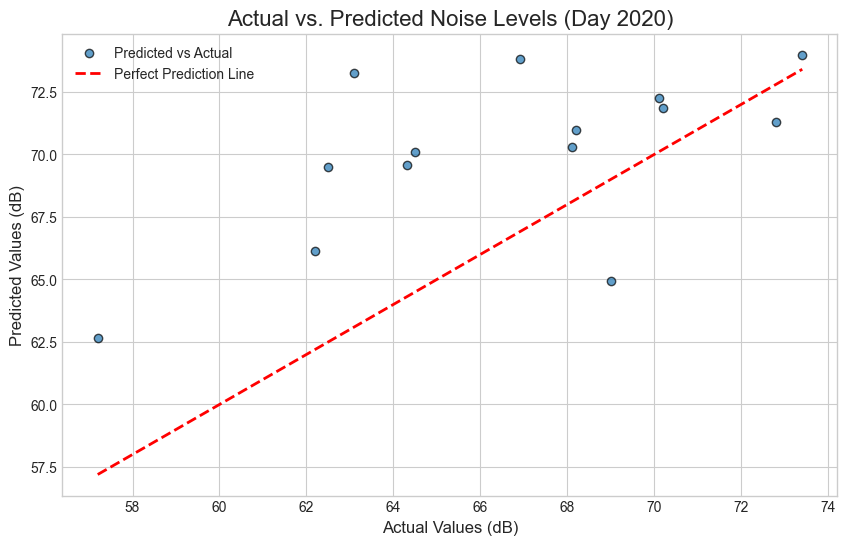

In [11]:
# Visualize the Results
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted vs Actual')
# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

plt.title('Actual vs. Predicted Noise Levels (Day 2020)', fontsize=16)
plt.xlabel('Actual Values (dB)', fontsize=12)
plt.ylabel('Predicted Values (dB)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()